In [ ]:
import pandas as pd
data = pd.read_csv(r"Mall_Customers.csv")

In [2]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


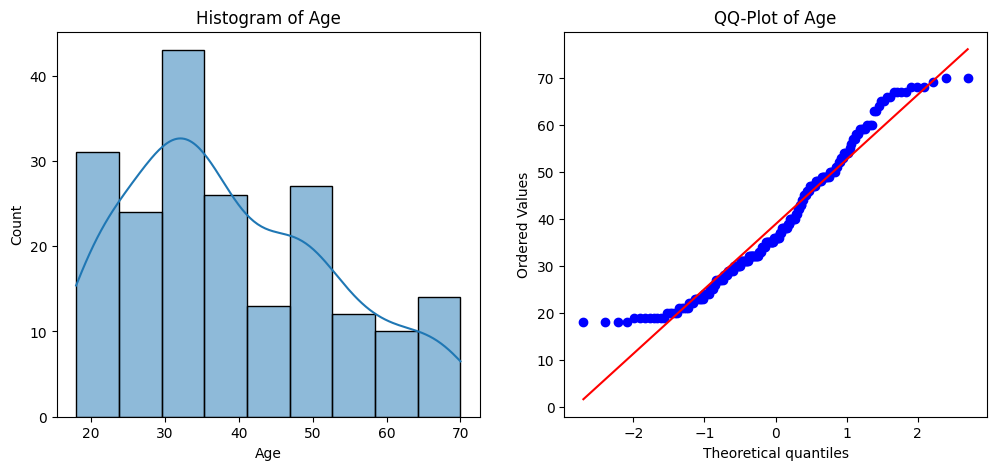

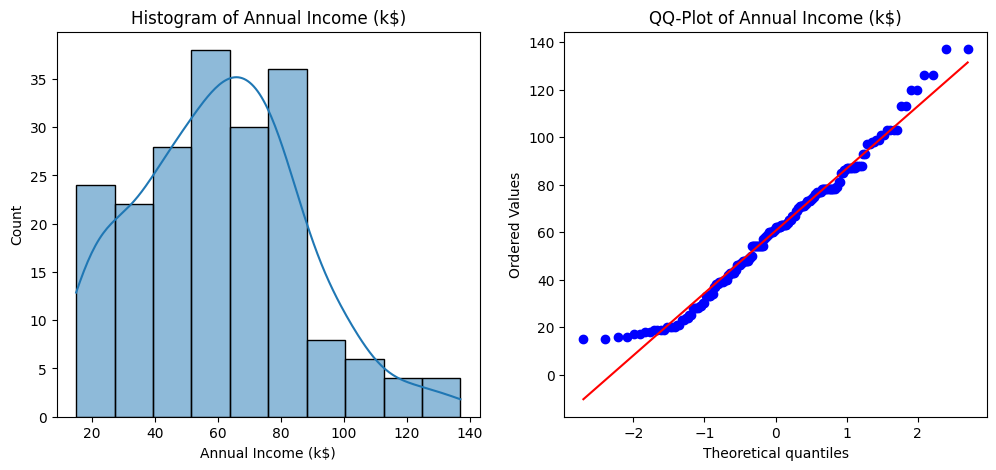

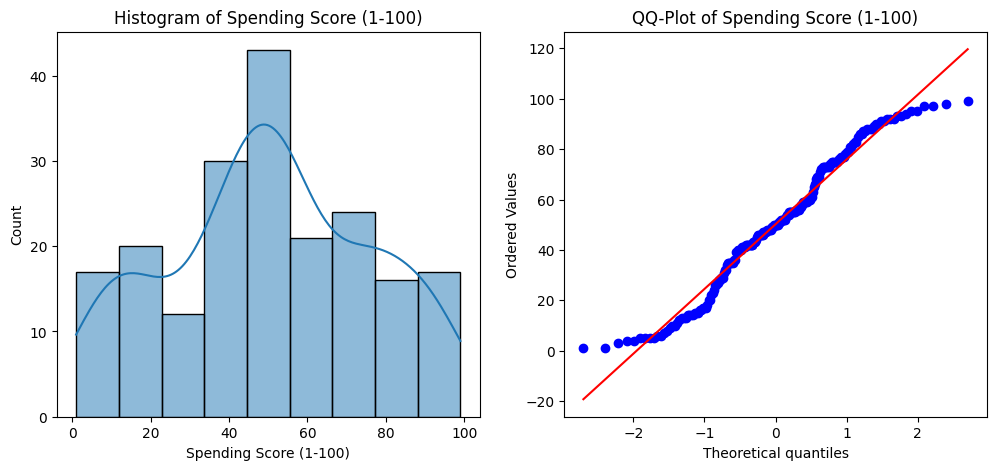

In [4]:
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

# Select features
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

for feature in features:
    plt.figure(figsize=(12, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data[feature], kde=True)
    plt.title(f'Histogram of {feature}')

    # QQ-Plot
    plt.subplot(1, 2, 2)
    stats.probplot(data[feature], dist="norm", plot=plt)
    plt.title(f'QQ-Plot of {feature}')

    plt.show()


In [5]:
from sklearn.preprocessing import StandardScaler

features = data[["Annual Income (k$)", "Spending Score (1-100)"]]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

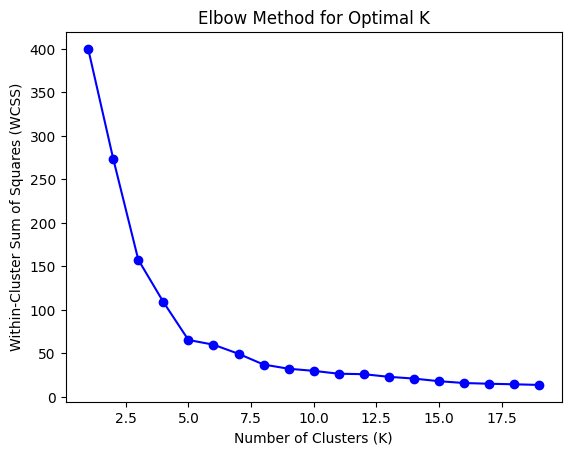

In [6]:
from sklearn.cluster import KMeans

wcss = []

for k in range(1,20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 20), wcss, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal K')
plt.show()

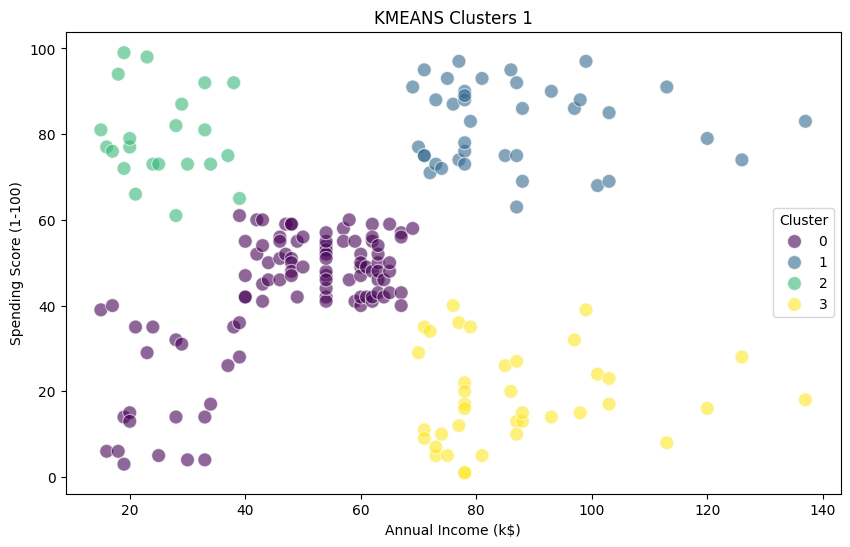

In [9]:
# clearly after 4 clusters the inertia slows down
optimal = 4
kmeans = KMeans(n_clusters=optimal, random_state=42)
clusters = kmeans.fit_predict(scaled_features)
data["kmeansclusters1"] = clusters

plt.figure(figsize=(10,6))
sns.scatterplot(x="Annual Income (k$)", y="Spending Score (1-100)", hue="kmeansclusters1", data=data, palette="viridis", s=100, alpha=0.6)
plt.title('KMEANS Clusters 1')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

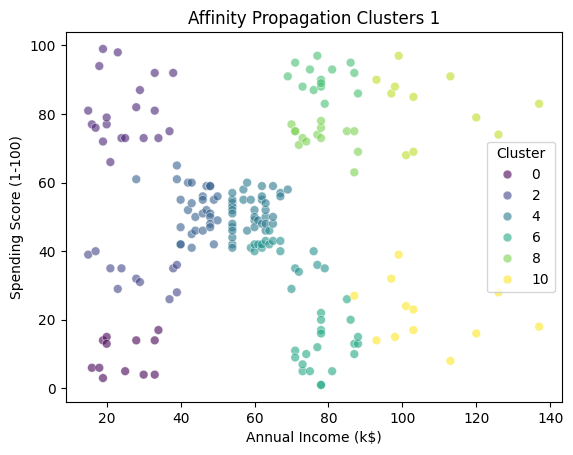

In [10]:
# since cluster are not spherical let us try another algorithm
from sklearn.cluster import AffinityPropagation

affinity = AffinityPropagation(random_state=42)
data["affinityclusters1"] = affinity.fit_predict(scaled_features)

sns.scatterplot(data = data, x = "Annual Income (k$)", y = "Spending Score (1-100)", hue = "affinityclusters1", s = 40, alpha = .6, palette="viridis")
plt.title('Affinity Propagation Clusters 1')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

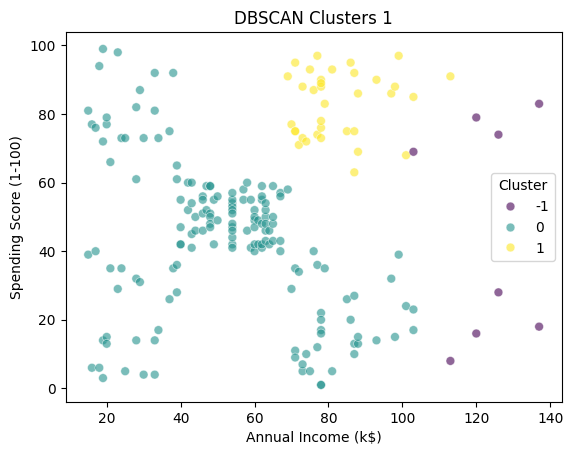

In [11]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN()
data["dbscanclusters1"] = dbscan.fit_predict(scaled_features)

sns.scatterplot(data = data, x = "Annual Income (k$)", y = "Spending Score (1-100)", hue = "dbscanclusters1", s = 40, alpha = .6, palette="viridis")
plt.title('DBSCAN Clusters 1')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

In [12]:
# dbscan too gave only 3 clusters so it might be possible that data is naturally seperated into more than 5 groups, let us continue the analysis with by including the age

In [13]:
features = data[["Age","Annual Income (k$)", "Spending Score (1-100)"]]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

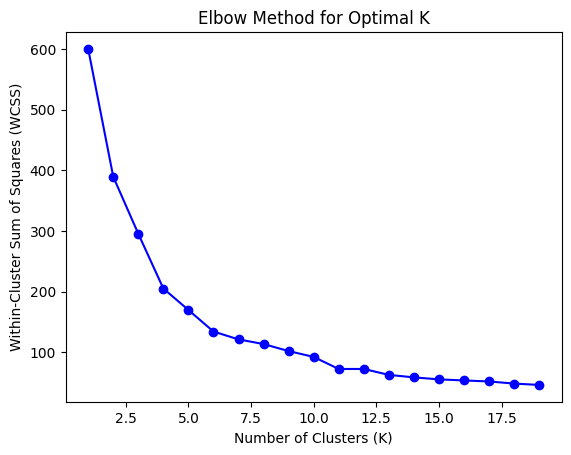

In [14]:
wcss = []

for k in range(1,20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 20), wcss, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal K')
plt.show()

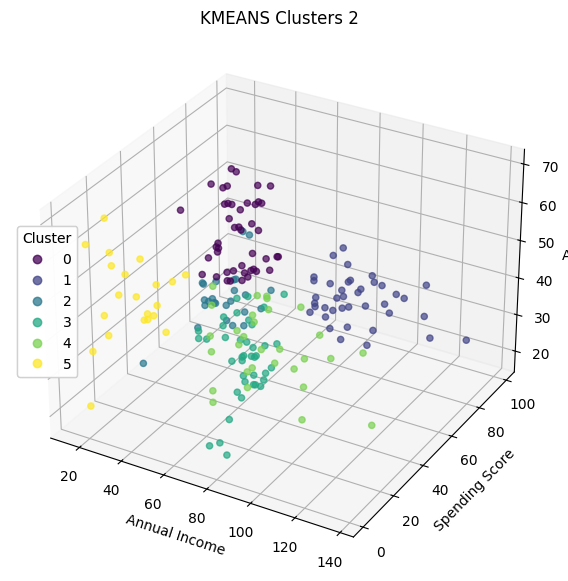

In [15]:
optimal = 6
kmeans = KMeans(n_clusters= optimal, random_state=42)
data["kmeansclusters2"] = kmeans.fit_predict(scaled_features)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], data['Age'], c=data['kmeansclusters2'], cmap='viridis', alpha=0.7)
ax.set_xlabel('Annual Income')
ax.set_ylabel('Spending Score')
ax.set_zlabel('Age')
ax.set_title('KMEANS Clusters 2')
legend1 = ax.legend(*scatter.legend_elements(), title="Cluster", loc="center left")
ax.add_artist(legend1)
plt.show()

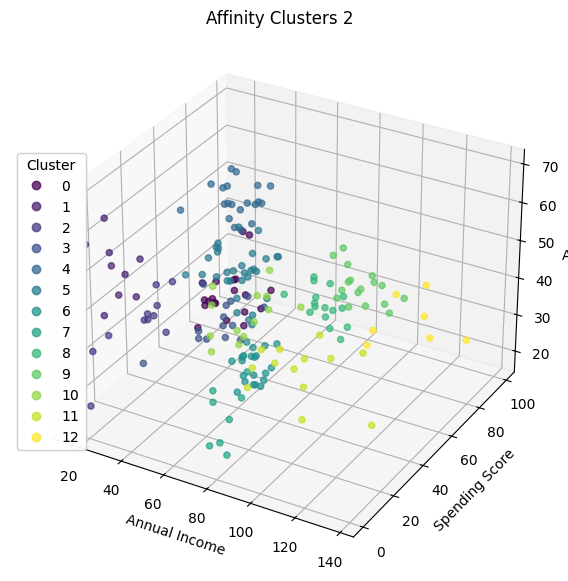

In [16]:
affinity = AffinityPropagation(random_state=42)
data["affinityclusters2"] = affinity.fit_predict(scaled_features)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], data['Age'], c=data['affinityclusters2'], cmap='viridis', alpha=0.7)
ax.set_xlabel('Annual Income')
ax.set_ylabel('Spending Score')
ax.set_zlabel('Age')
ax.set_title('Affinity Clusters 2')
legend1 = ax.legend(*scatter.legend_elements(), title="Cluster", loc="center left")
ax.add_artist(legend1)
plt.show()

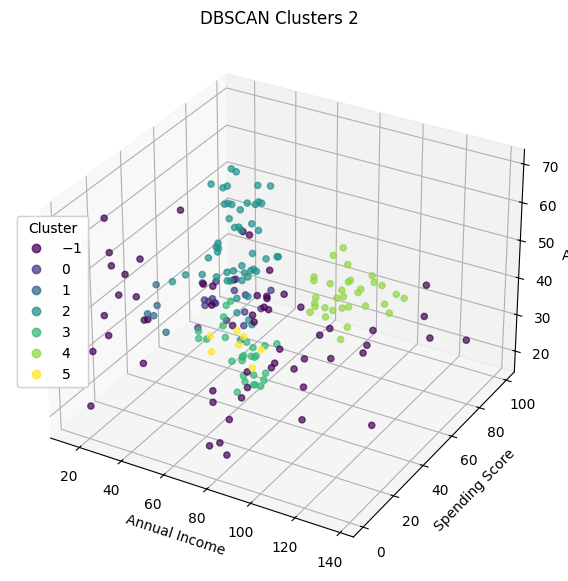

In [17]:
dbscan = DBSCAN()
data["dbscanclusters2"] = dbscan.fit_predict(scaled_features)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], data['Age'], c=data['dbscanclusters2'], cmap='viridis', alpha=0.7)
ax.set_xlabel('Annual Income')
ax.set_ylabel('Spending Score')
ax.set_zlabel('Age')
ax.set_title('DBSCAN Clusters 2')
legend1 = ax.legend(*scatter.legend_elements(), title="Cluster", loc="center left")
ax.add_artist(legend1)
plt.show()

In [27]:
# clearly it is hard to see, for fun let's apply pca and see its results
# note applying PCA is just for fun, it doesn't make any sense 
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_features)
data_pca = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2'])
data = pd.concat([data,data_pca], axis=1)

In [28]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),kmeansclusters1,affinityclusters1,dbscanclusters1,kmeansclusters2,affinityclusters2,dbscanclusters2,PC1,PC2,PC1,PC2
0,1,Male,19,15,39,0,2,0,2,3,-1,-0.615720,-1.763481,-0.615720,-1.763481
1,2,Male,21,15,81,2,1,0,2,0,0,-1.665793,-1.820747,-1.665793,-1.820747
2,3,Female,20,16,6,0,0,0,5,2,-1,0.337862,-1.674799,0.337862,-1.674799
3,4,Female,23,16,77,2,1,0,2,0,0,-1.456573,-1.772430,-1.456573,-1.772430
4,5,Female,31,17,40,0,2,0,5,2,-1,-0.038465,-1.662740,-0.038465,-1.662740


In [29]:
a, b, c = data["kmeansclusters1"].nunique(), data["affinityclusters1"].nunique(), data["dbscanclusters1"].nunique()
d, e, f = data["kmeansclusters2"].nunique(), data["affinityclusters2"].nunique(), data["dbscanclusters2"].nunique()
print(f"Clusters for {'Annual Income (k$)':<10},  Spending Score (1-100):")
print(f"Kmeans Clusters: {a}, Affinity Propagation Clusters: {b}, , DBSCAN Clusters: {c}")
print(f"Clusters for {'Age':<18}, {'Annual Income (k$)':<23}, Spending Score (1-100):") 
print(f"Kmeans Clusters: {d}, Affinity Propagation Clusters: {e}, DBSCAN Clusters: {f}")

Clusters for Annual Income (k$),  Spending Score (1-100):
Kmeans Clusters: 4, Affinity Propagation Clusters: 11, , DBSCAN Clusters: 3
Clusters for Age               , Annual Income (k$)     , Spending Score (1-100):
Kmeans Clusters: 6, Affinity Propagation Clusters: 13, DBSCAN Clusters: 7


In [30]:
## KMeans (4 → 6 Clusters)
# KMeans assumes spherical clusters and tries to divide data into groups that minimize intra-cluster variance.
# Adding Age likely made the data more spread out and adding more clusters.

## Affinity Propagation (11 → 13 Clusters)
# This method finds exemplar points that best represent the data distribution.
# Since Age introduced new local patterns, more exemplars were selected.

## DBSCAN (3 → 7 Clusters)
# DBSCAN is based on density, so adding Age created new dense areas that were recognized as new clusters.
# The increase in clusters suggests that before, some points were considered noise, but with Age included, they formed new dense groups.

In [31]:
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance: {explained_variance}")
print(f"Cumulative Variance: {explained_variance.cumsum()}")

Explained Variance: [0.44266167 0.33308378]
Cumulative Variance: [0.44266167 0.77574546]


In [34]:
# the pca didn't produce any relevant results. 